c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\stat

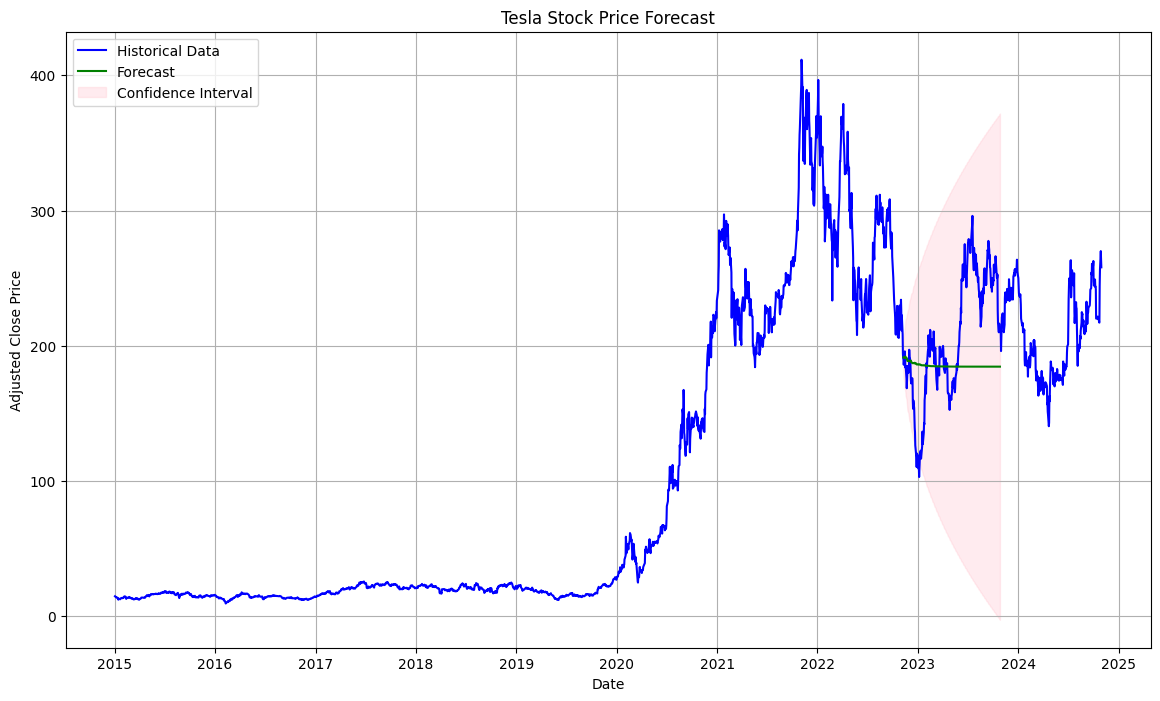

Forecasted Price on Last Day: 184.58834129882848
Confidence Interval on Last Day: (np.float64(-2.4824001408259164), np.float64(371.6590827384829))


C:\Users\HP\AppData\Local\Temp\ipykernel_23776\1978398235.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Forecasted Price on Last Day:", forecast_series[-1])
C:\Users\HP\AppData\Local\Temp\ipykernel_23776\1978398235.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Confidence Interval on Last Day:", (lower_series[-1], upper_series[-1]))


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data (ensure the time series data is in a DataFrame)
# Replace 'your_data.csv' with your dataset file
data = pd.read_csv('../data/TSLA_data_cleaned.csv', parse_dates=['Date.1'], index_col='Date.1')
tsla_data = data['Adj Close']  # Replace with the column name for Tesla's adjusted closing prices

# Define the forecast horizon (e.g., 6–12 months)
forecast_steps = 252  # Assuming 252 trading days in a year (6-12 months)

# Train-Test Split
train_size = int(len(tsla_data) * 0.8)  # 80% for training
train_data = tsla_data[:train_size]
test_data = tsla_data[train_size:]

# Load or Train the SARIMA Model
# If the model is already trained, load it. Else, train it using SARIMAX.
sarima_model = SARIMAX(
    train_data,
    order=(2, 1, 2),            # Replace with the best ARIMA parameters
    seasonal_order=(1, 0, 1, 12)  # Replace with the best seasonal parameters
)
sarima_fitted = sarima_model.fit(disp=False)

# Forecast future values
forecast = sarima_fitted.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Combine historical and forecasted data for plotting
forecast_dates = pd.date_range(start=train_data.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_series = pd.Series(forecast_values.values, index=forecast_dates)
lower_series = pd.Series(confidence_intervals.iloc[:, 0].values, index=forecast_dates)
upper_series = pd.Series(confidence_intervals.iloc[:, 1].values, index=forecast_dates)

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(tsla_data, label="Historical Data", color="blue")
plt.plot(forecast_series, label="Forecast", color="green")
plt.fill_between(forecast_dates, lower_series, upper_series, color='pink', alpha=0.3, label="Confidence Interval")
plt.title("Tesla Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Analyze results
# Example analysis code
print("Forecasted Price on Last Day:", forecast_series[-1])
print("Confidence Interval on Last Day:", (lower_series[-1], upper_series[-1]))

# Save forecast data for further use
forecast_df = pd.DataFrame({
    "Date": forecast_dates,
    "Forecast": forecast_series.values,
    "Lower CI": lower_series.values,
    "Upper CI": upper_series.values
})
forecast_df.to_csv("../data/TSLA_data_forecast.csv", index=False)


c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\ba

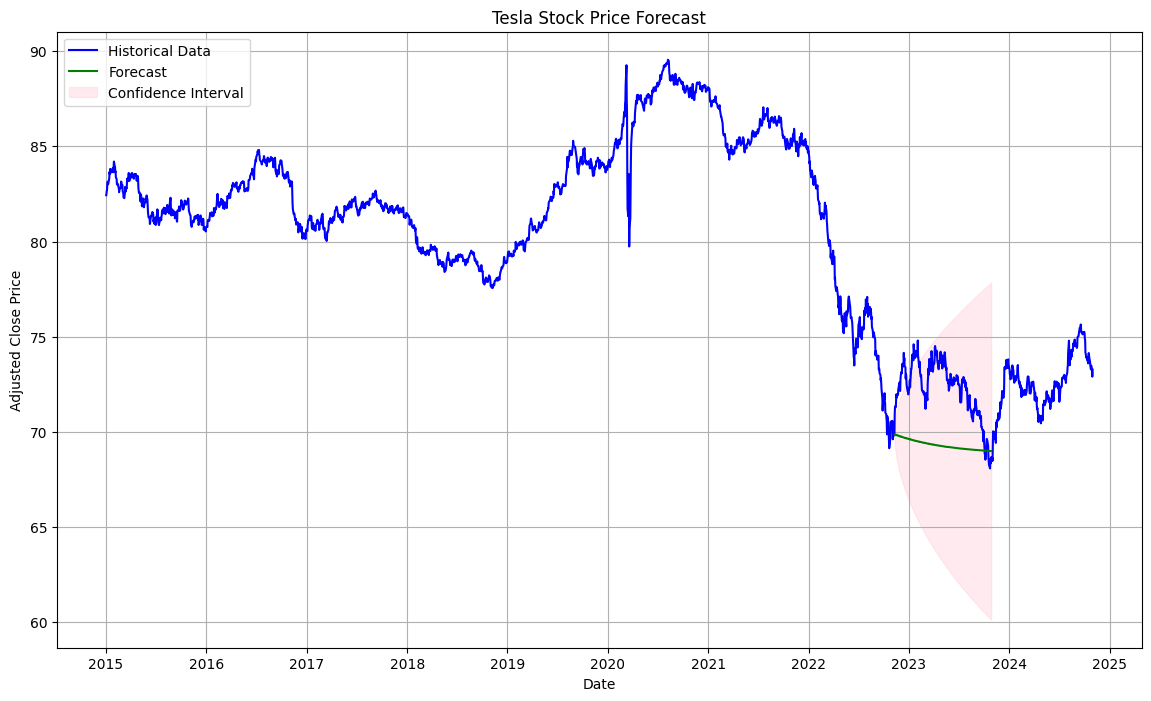

Forecasted Price on Last Day: 68.99090074252344
Confidence Interval on Last Day: (np.float64(60.13087406381777), np.float64(77.8509274212291))


C:\Users\HP\AppData\Local\Temp\ipykernel_23776\2590011879.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Forecasted Price on Last Day:", forecast_series[-1])
C:\Users\HP\AppData\Local\Temp\ipykernel_23776\2590011879.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Confidence Interval on Last Day:", (lower_series[-1], upper_series[-1]))


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data (ensure the time series data is in a DataFrame)
# Replace 'your_data.csv' with your dataset file
data = pd.read_csv('../data/BND_data_cleaned.csv', parse_dates=['Date.1'], index_col='Date.1')
tsla_data = data['Adj Close']  # Replace with the column name for Tesla's adjusted closing prices

# Define the forecast horizon (e.g., 6–12 months)
forecast_steps = 252  # Assuming 252 trading days in a year (6-12 months)

# Train-Test Split
train_size = int(len(tsla_data) * 0.8)  # 80% for training
train_data = tsla_data[:train_size]
test_data = tsla_data[train_size:]

# Load or Train the SARIMA Model
# If the model is already trained, load it. Else, train it using SARIMAX.
sarima_model = SARIMAX(
    train_data,
    order=(2, 1, 2),            # Replace with the best ARIMA parameters
    seasonal_order=(1, 0, 1, 12)  # Replace with the best seasonal parameters
)
sarima_fitted = sarima_model.fit(disp=False)

# Forecast future values
forecast = sarima_fitted.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Combine historical and forecasted data for plotting
forecast_dates = pd.date_range(start=train_data.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_series = pd.Series(forecast_values.values, index=forecast_dates)
lower_series = pd.Series(confidence_intervals.iloc[:, 0].values, index=forecast_dates)
upper_series = pd.Series(confidence_intervals.iloc[:, 1].values, index=forecast_dates)

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(tsla_data, label="Historical Data", color="blue")
plt.plot(forecast_series, label="Forecast", color="green")
plt.fill_between(forecast_dates, lower_series, upper_series, color='pink', alpha=0.3, label="Confidence Interval")
plt.title("Tesla Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Analyze results
# Example analysis code
print("Forecasted Price on Last Day:", forecast_series[-1])
print("Confidence Interval on Last Day:", (lower_series[-1], upper_series[-1]))

# Save forecast data for further use
forecast_df = pd.DataFrame({
    "Date": forecast_dates,
    "Forecast": forecast_series.values,
    "Lower CI": lower_series.values,
    "Upper CI": upper_series.values
})
forecast_df.to_csv("../data/BND_data_forecast.csv", index=False)


c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\ba

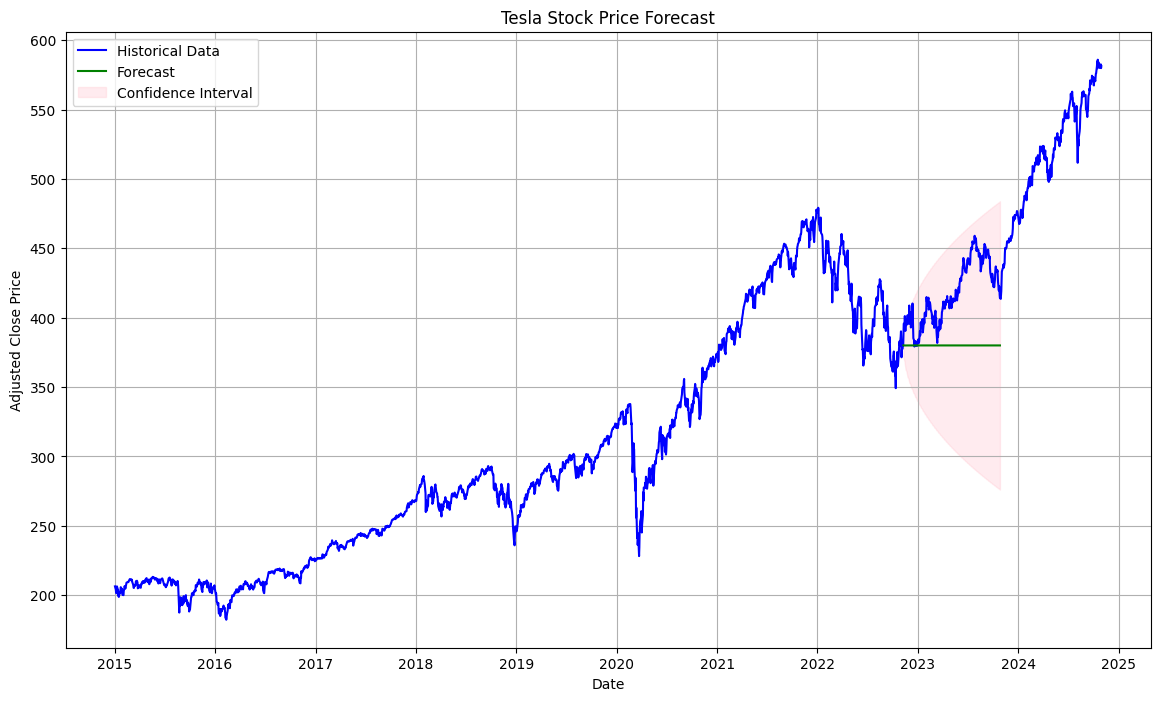

Forecasted Price on Last Day: 380.0068329194355
Confidence Interval on Last Day: (np.float64(276.11871304765026), np.float64(483.89495279122076))


C:\Users\HP\AppData\Local\Temp\ipykernel_23776\2580845662.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Forecasted Price on Last Day:", forecast_series[-1])
C:\Users\HP\AppData\Local\Temp\ipykernel_23776\2580845662.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Confidence Interval on Last Day:", (lower_series[-1], upper_series[-1]))


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data (ensure the time series data is in a DataFrame)
# Replace 'your_data.csv' with your dataset file
data = pd.read_csv('../data/SPY_data_cleaned.csv', parse_dates=['Date.1'], index_col='Date.1')
tsla_data = data['Adj Close']  # Replace with the column name for Tesla's adjusted closing prices

# Define the forecast horizon (e.g., 6–12 months)
forecast_steps = 252  # Assuming 252 trading days in a year (6-12 months)

# Train-Test Split
train_size = int(len(tsla_data) * 0.8)  # 80% for training
train_data = tsla_data[:train_size]
test_data = tsla_data[train_size:]

# Load or Train the SARIMA Model
# If the model is already trained, load it. Else, train it using SARIMAX.
sarima_model = SARIMAX(
    train_data,
    order=(2, 1, 2),            # Replace with the best ARIMA parameters
    seasonal_order=(1, 0, 1, 12)  # Replace with the best seasonal parameters
)
sarima_fitted = sarima_model.fit(disp=False)

# Forecast future values
forecast = sarima_fitted.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Combine historical and forecasted data for plotting
forecast_dates = pd.date_range(start=train_data.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_series = pd.Series(forecast_values.values, index=forecast_dates)
lower_series = pd.Series(confidence_intervals.iloc[:, 0].values, index=forecast_dates)
upper_series = pd.Series(confidence_intervals.iloc[:, 1].values, index=forecast_dates)

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(tsla_data, label="Historical Data", color="blue")
plt.plot(forecast_series, label="Forecast", color="green")
plt.fill_between(forecast_dates, lower_series, upper_series, color='pink', alpha=0.3, label="Confidence Interval")
plt.title("Tesla Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Analyze results
# Example analysis code
print("Forecasted Price on Last Day:", forecast_series[-1])
print("Confidence Interval on Last Day:", (lower_series[-1], upper_series[-1]))

# Save forecast data for further use
forecast_df = pd.DataFrame({
    "Date": forecast_dates,
    "Forecast": forecast_series.values,
    "Lower CI": lower_series.values,
    "Upper CI": upper_series.values
})
forecast_df.to_csv("../data/SPY_data_forecast.csv", index=False)
